In [1]:
%reset -f

In [2]:
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from datetime                    import datetime

In [3]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

# load data

In [4]:
df = pd.read_stata("airline.dta")

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

In [5]:
df['miles'].describe()

count       96.000000
mean     10385.739258
std       2202.500488
min       6178.000000
25%       8600.250000
50%      10401.000000
75%      11768.000000
max      16234.000000
Name: miles, dtype: float64

In [ ]:
df.head(12)

,year,month,miles
0,1963,1,6827.0
1,1963,2,6178.0
2,1963,3,7084.0
3,1963,4,8162.0
4,1963,5,8462.0
5,1963,6,9644.0
6,1963,7,10466.0
7,1963,8,10748.0
8,1963,9,9963.0
9,1963,10,8194.0


# set time index

In [7]:
df['dat'] = df['year'] + '-' + df['month']

df.head(12)

,year,month,miles,dat
0,1963,1,6827.0,1963-1
1,1963,2,6178.0,1963-2
2,1963,3,7084.0,1963-3
3,1963,4,8162.0,1963-4
4,1963,5,8462.0,1963-5
5,1963,6,9644.0,1963-6
6,1963,7,10466.0,1963-7
7,1963,8,10748.0,1963-8
8,1963,9,9963.0,1963-9
9,1963,10,8194.0,1963-10


In [8]:
df = df.set_index('dat')

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)


df.head()

,year,month,miles
dat,,,
1963-1,1963,1,6827.0
1963-2,1963,2,6178.0
1963-3,1963,3,7084.0
1963-4,1963,4,8162.0
1963-5,1963,5,8462.0


# plot time seires

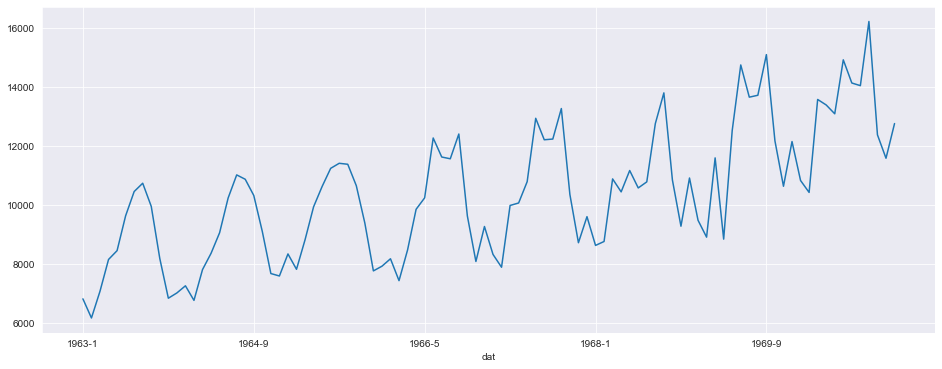

In [9]:
df['miles'].plot()
plt.show()

In [10]:
df1 = df[df['year']<=1966]

In [11]:
df1.head()

,year,month,miles
dat,,,
1963-1,1963,1,6827.0
1963-2,1963,2,6178.0
1963-3,1963,3,7084.0
1963-4,1963,4,8162.0
1963-5,1963,5,8462.0


In [12]:
df1.tail()

,year,month,miles
dat,,,
1966-8,1966,8,11577.0
1966-9,1966,9,12417.0
1966-10,1966,10,9637.0
1966-11,1966,11,8094.0
1966-12,1966,12,9280.0


In [13]:
df1['miles'].describe()

count       48.000000
mean      9174.583008
std       1641.827759
min       6178.000000
25%       7826.500000
50%       9089.000000
75%      10509.000000
max      12417.000000
Name: miles, dtype: float64

In [14]:
df['trend'] = range(1,len(df['miles'])+1)
df.head()

,year,month,miles,trend
dat,,,,
1963-1,1963,1,6827.0,1
1963-2,1963,2,6178.0,2
1963-3,1963,3,7084.0,3
1963-4,1963,4,8162.0,4
1963-5,1963,5,8462.0,5


In [15]:
df.tail()

,year,month,miles,trend
dat,,,,
1978-8,1978,8,NaN,188
1978-9,1978,9,NaN,189
1978-10,1978,10,NaN,190
1978-11,1978,11,NaN,191
1978-12,1978,12,NaN,192


# regression with trend

In [16]:
X = df[['trend']]
X = sm.add_constant(X)
Y = df[['miles']]

reg = sm.OLS(Y, X, missing='drop')

result = reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  miles   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     84.52
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           9.53e-15
Time:                        11:44:18   Log-Likelihood:                -843.87
No. Observations:                  96   AIC:                             1692.
Df Residuals:                      94   BIC:                             1697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7747.1741    330.542     23.438      0.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
df['yhat'] = result.predict(X)
df.head(12)

,year,month,miles,trend,yhat
dat,,,,,
1963-1,1963,1,6827.0,1,7801.577534
1963-2,1963,2,6178.0,2,7855.980946
1963-3,1963,3,7084.0,3,7910.384357
1963-4,1963,4,8162.0,4,7964.787769
1963-5,1963,5,8462.0,5,8019.191181
1963-6,1963,6,9644.0,6,8073.594592
1963-7,1963,7,10466.0,7,8127.998004
1963-8,1963,8,10748.0,8,8182.401415
1963-9,1963,9,9963.0,9,8236.804827


In [18]:
df['ehat'] = df['miles'] - result.predict(X)
df.head(12)

,year,month,miles,trend,yhat,ehat
dat,,,,,,
1963-1,1963,1,6827.0,1,7801.577534,-974.577534
1963-2,1963,2,6178.0,2,7855.980946,-1677.980946
1963-3,1963,3,7084.0,3,7910.384357,-826.384357
1963-4,1963,4,8162.0,4,7964.787769,197.212231
1963-5,1963,5,8462.0,5,8019.191181,442.808819
1963-6,1963,6,9644.0,6,8073.594592,1570.405408
1963-7,1963,7,10466.0,7,8127.998004,2338.001996
1963-8,1963,8,10748.0,8,8182.401415,2565.598585
1963-9,1963,9,9963.0,9,8236.804827,1726.195173


# plot predicted value and error

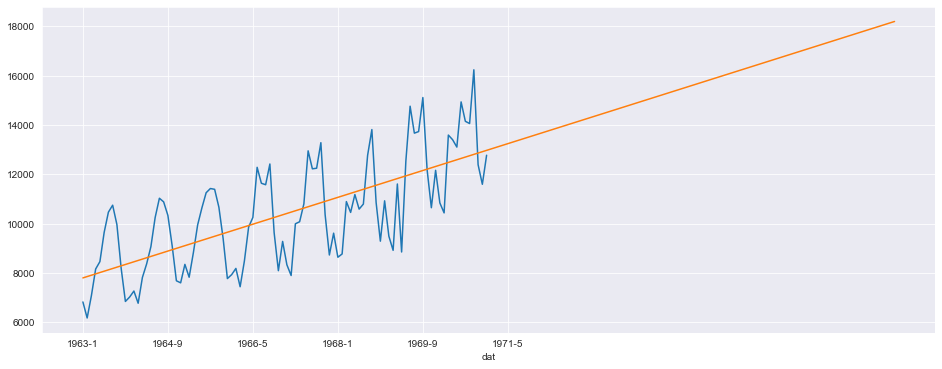

In [19]:
df['miles'].plot()
df['yhat'].plot()
plt.show()

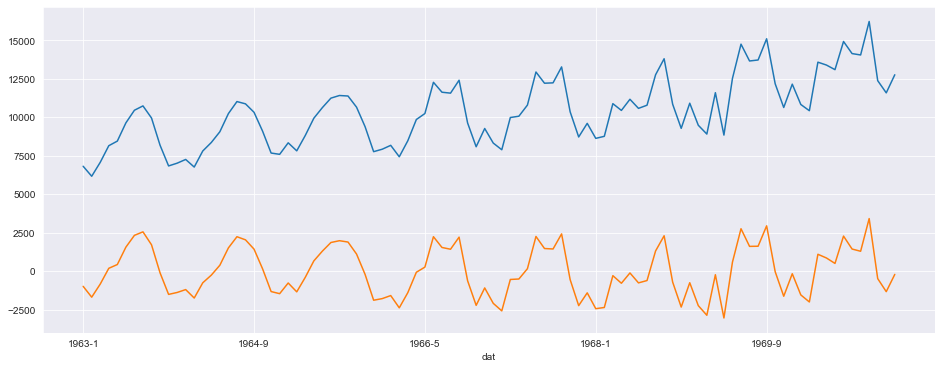

In [20]:
df['miles'].plot()
df['ehat'].plot()
plt.show()

In [21]:
df['ehat'].describe()

count    9.600000e+01
mean     1.629511e-12
std      1.598204e+03
min     -3.029833e+03
25%     -1.342751e+03
50%     -1.993959e+02
75%      1.449895e+03
max      3.427309e+03
Name: ehat, dtype: float64

In [22]:
df2 = df[(df['month'] <= 9) & (df['month'] >= 6)]
df2['ehat'].describe()

count      32.000000
mean     1786.763255
std       835.730770
min      -749.799286
25%      1451.454979
50%      1799.959352
75%      2271.160949
max      3427.308602
Name: ehat, dtype: float64

# generate regression dummies

In [23]:
dummy = pd.get_dummies(df["month"])
dummy.columns = ["m1", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9", "m10", "m11", "m12"]
dummy.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
dat,,,,,,,,,,,,
1963-1,1,0,0,0,0,0,0,0,0,0,0,0
1963-2,0,1,0,0,0,0,0,0,0,0,0,0
1963-3,0,0,1,0,0,0,0,0,0,0,0,0
1963-4,0,0,0,1,0,0,0,0,0,0,0,0
1963-5,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
df2 =  pd.concat([df, dummy], axis=1)
df2 =  df2.drop(columns=['m1'])

df2.head()

,year,month,miles,trend,yhat,ehat,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
dat,,,,,,,,,,,,,,,,,
1963-1,1963,1,6827.0,1,7801.577534,-974.577534,0,0,0,0,0,0,0,0,0,0,0
1963-2,1963,2,6178.0,2,7855.980946,-1677.980946,1,0,0,0,0,0,0,0,0,0,0
1963-3,1963,3,7084.0,3,7910.384357,-826.384357,0,1,0,0,0,0,0,0,0,0,0
1963-4,1963,4,8162.0,4,7964.787769,197.212231,0,0,1,0,0,0,0,0,0,0,0
1963-5,1963,5,8462.0,5,8019.191181,442.808819,0,0,0,1,0,0,0,0,0,0,0


# regression with trend and dummies

In [25]:
XX = df2[["trend", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9", "m10", "m11", "m12"]]
XX = sm.add_constant(XX)
YY = df2[['miles']]

reg1 = sm.OLS(YY, XX, missing='drop')

result1 = reg1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  miles   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     66.58
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           2.28e-37
Time:                        11:44:18   Log-Likelihood:                -761.22
No. Observations:                  96   AIC:                             1548.
Df Residuals:                      83   BIC:                             1582.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6214.6957    280.408     22.163      0.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
df2['yhat'] = result1.predict(XX)
df2.head(12)

,year,month,miles,trend,yhat,ehat,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
dat,,,,,,,,,,,,,,,,,
1963-1,1963,1,6827.0,1,6267.65625,-974.577534,0,0,0,0,0,0,0,0,0,0,0
1963-2,1963,2,6178.0,2,5807.15625,-1677.980946,1,0,0,0,0,0,0,0,0,0,0
1963-3,1963,3,7084.0,3,7563.15625,-826.384357,0,1,0,0,0,0,0,0,0,0,0
1963-4,1963,4,8162.0,4,7667.15625,197.212231,0,0,1,0,0,0,0,0,0,0,0
1963-5,1963,5,8462.0,5,8530.78125,442.808819,0,0,0,1,0,0,0,0,0,0,0
1963-6,1963,6,9644.0,6,9857.78125,1570.405408,0,0,0,0,1,0,0,0,0,0,0
1963-7,1963,7,10466.0,7,9699.03125,2338.001996,0,0,0,0,0,1,0,0,0,0,0
1963-8,1963,8,10748.0,8,9950.90625,2565.598585,0,0,0,0,0,0,1,0,0,0,0
1963-9,1963,9,9963.0,9,10502.53125,1726.195173,0,0,0,0,0,0,0,1,0,0,0


# plot everything together

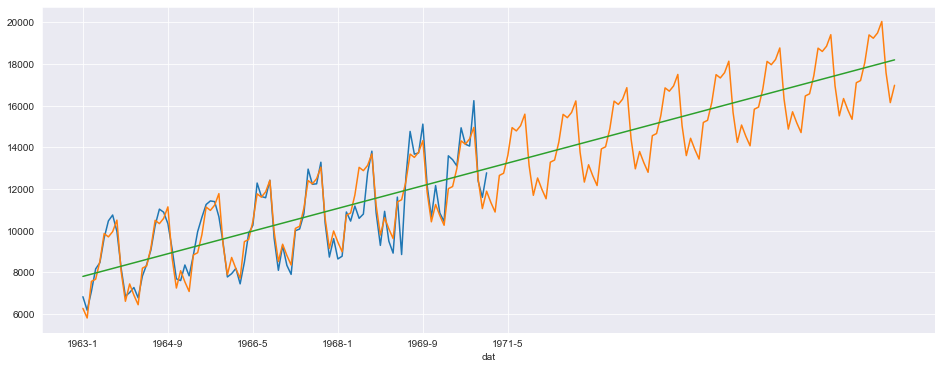

In [31]:
df2['miles'].plot()
df2['yhat'].plot()
df['yhat'].plot()
plt.show()

In [32]:
!rm -rf W2_Python.html
!jupyter nbconvert --to html W2_Python.ipynb

[NbConvertApp] Converting notebook W2_Python.ipynb to html
[NbConvertApp] Writing 887678 bytes to W2_Python.html
